In [42]:
import pandas as pd
import numpy as np
from skimpy import skim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [11]:
#Importing csv
data = pd.read_csv('./data/student-mat.csv')

In [12]:
#Understanding the data
#first 5 rows of data
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [13]:
#Getting Final Grade
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [14]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 395    │ │ string      │ 17    │                                                          │
│ │ Number of columns │ 33     │ │ int32       │ 16    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ age               │    0 │       0 │      17 │     1.3 │   15 │    16 │    17 │    18 │      22 │   ▇▅▃▁   │  │
│ │ Medu              │    0 │       0 │     2.7 │     1.1 │    0 │     2 │     3 │     4 │       4 │   ▃ ▆▆▇  │  │
│ │ Fedu              │    0 │       0 │     2.5 │     1.1 │    0 │     2 │     2 │     3 │       4 │   ▆ ▇▇▇  │  │
│ │ traveltime        │    0 │       0 │     1.4 │     0.7 │    1 │     1 │     1 │     2 │       4 │  ▇ ▃ ▁   │  │
│ │ studytime         │    0 │       0 │       2 │    0.84 │    1 │     1 │     2 │     2 │       4 │  ▅ ▇ ▃▁  │  │
│ │ failures          │    0 │       0 │    0.33 │    0.74 │    0 │     0 │     0 │     0 │       3 │   ▇ ▁    │  │
│ │ famrel            │    0 │       0 │     3.9 │     0.9 │    1 │     4 │     4 │     5 │       5 │   ▁ ▃▇▅  │  │
│ │ freetime          │    0 │       0 │     3.2 │       1 │    1 │     3 │     3 │     4 │       5 │  ▁▃ ▇▆▂  │  │
│ │ goout             │    0 │       0 │     3.1 │     1.1 │    1 │     2 │     3 │     4 │       5 │  ▁▆ ▇▅▃  │  │
│ │ Dalc              │    0 │       0 │     1.5 │    0.89 │    1 │     1 │     1 │     2 │       5 │   ▇▂ ▁   │  │
│ │ Walc              │    0 │       0 │     2.3 │     1.3 │    1 │     1 │     2 │     3 │       5 │  ▇▅ ▅▃▁  │  │
│ │ health            │    0 │       0 │     3.6 │     1.4 │    1 │     3 │     4 │     5 │       5 │  ▃▂ ▅▃▇  │  │
│ │ absences          │    0 │       0 │     5.7 │       8 │    0 │     0 │     4 │     8 │      75 │    ▇▁    │  │
│ │ G1                │    0 │       0 │      11 │     3.3 │    3 │     8 │    11 │    13 │      19 │  ▁▇▆▇▆▁  │  │
│ │ G2                │    0 │       0 │      11 │     3.8 │    0 │     9 │    11 │    13 │      19 │  ▁▂▇▇▆▂  │  │
│ │ G3                │    0 │       0 │      10 │     4.6 │    0 │     8 │    11 │    14 │      20 │  ▂▁▃▇▃▁  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ school                    │       0 │          0 │                            1 │                      395 │  │
│ │ sex                       │       0 │          0 │  

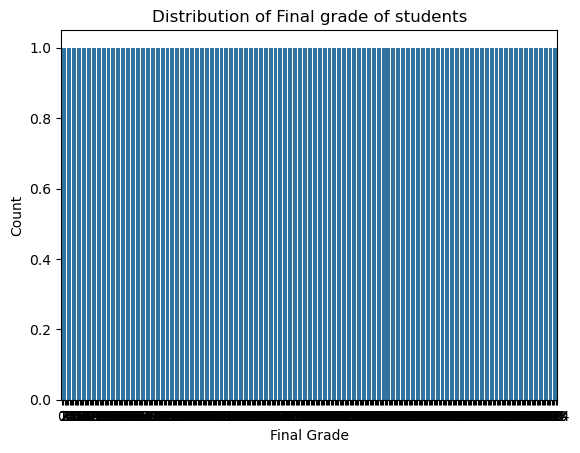

In [15]:
b = sns.countplot(data['G3'])
b.axes.set_title('Distribution of Final grade of students')
b.set_xlabel('Final Grade')
b.set_ylabel('Count')
plt.show()

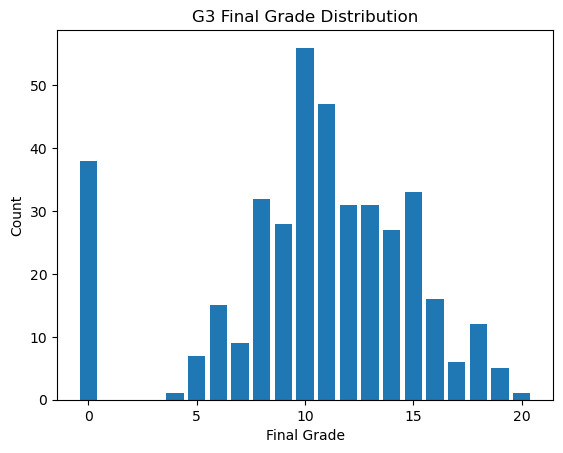

In [16]:
# Get the counts of each unique value in the G3 column
g3_counts = data['G3'].value_counts()

# Create a bar graph of the G3 column data
plt.bar(g3_counts.index, g3_counts.values)

# Set the title and labels
plt.title('G3 Final Grade Distribution')
plt.xlabel('Final Grade')
plt.ylabel('Count')

# Show the plot
plt.show()


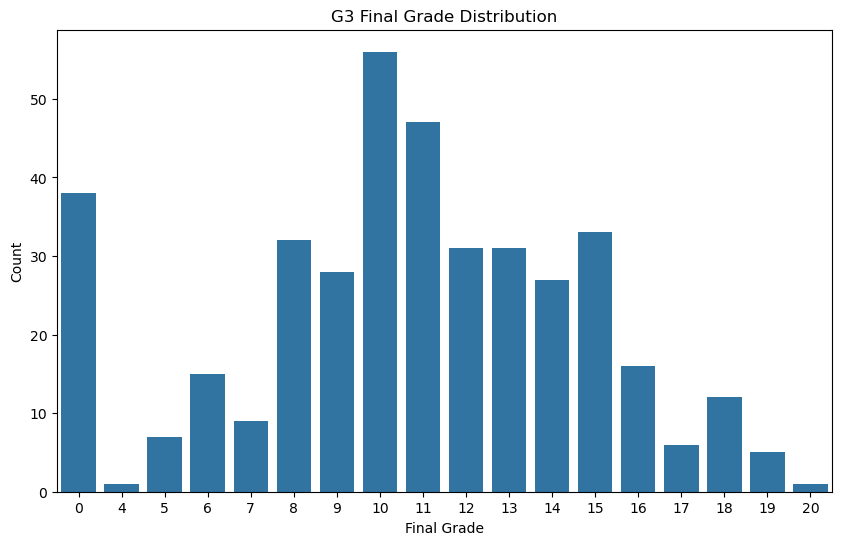

In [17]:
# Create a count plot of the G3 column data using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='G3', data=data)

# Set the title and labels
plt.title('G3 Final Grade Distribution')
plt.xlabel('Final Grade')
plt.ylabel('Count')

# Show the plot
plt.show()

In [18]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [19]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [20]:
data.shape

(395, 33)

In [21]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [22]:
male_student = len(data[data['sex'] == 'M'])
female_student = len(data[data['sex'] == 'F'])
print('Number of male students:',male_student)
print('Number of female students:',female_student)


Number of male students: 187
Number of female students: 208


In [23]:
data['GradeAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3

In [24]:
def find_grade(data):
    
    grades = []

    for row in data['GradeAvg']:
        if row >= (0.9 * data['GradeAvg'].max()):
            grades.append('1')

        elif row >= (0.7*data['GradeAvg'].max()):
            grades.append('2')
        
        elif row < (0.7*data['GradeAvg'].max()):
            grades.append('3')

    data['GradeAvg'] = grades   
    return data


In [25]:
data_dum = find_grade(data)

In [26]:
data_dum.drop(['school','age'], axis=1,inplace=True)

In [27]:
data_dum.head()

sex address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason guardian  \
0   F       U     GT3       A     4     4  at_home   teacher  course   mother   
1   F       U     GT3       T     1     1  at_home     other  course   father   
2   F       U     LE3       T     1     1  at_home     other   other   mother   
3   F       U     GT3       T     4     2   health  services    home   mother   
4   F       U     GT3       T     3     3    other     other    home   father   

   ...  freetime  goout  Dalc Walc health absences  G1  G2  G3 GradeAvg  
0  ...         3      4     1    1      3        6   5   6   6        3  
1  ...         3      3     1    1      3        4   5   5   6        3  
2  ...         3      2     2    3      3       10   7   8  10        3  
3  ...         2      2     1    1      5        2  15  14  15        2  
4  ...         3      2     1    2      5        4   6  10  10        3  

[5 rows x 32 columns]

In [28]:
data_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [29]:
x = data_dum.drop('G3',axis=1)
y = data_dum['G3']

In [30]:
data_dum['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [58]:
X_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)


In [59]:
print(X_train.columns)

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'GradeAvg'],
      dtype='object')


In [70]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=[ 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'])

# Split the dataset into features and target
X = data_encoded.drop('G3', axis=1)
y = data_encoded['G3']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
from sklearn.linear_model import LinearRegression

L = LinearRegression()
L.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = L.predict(X_test)

In [77]:
print(L.score(X_test,y_test))

0.6829492225708848
